In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_pickle('../data/tc_energies.pkl')
df = df.drop('index', 1)
df.head()

,zside,layer,subdet,evt,mboard_id,mod_id,tc_id,tc_energy
0,1,6,3,5001,0,1731470847,1731483919,0.000000
1,1,6,3,5003,0,1731470847,1731483919,0.000000
2,1,6,3,5002,0,1731470847,1731483919,0.000000
3,1,6,3,5004,0,1731470847,1731483919,0.000000
4,1,6,3,5005,0,1731470847,1731483919,0.368594


/home/jamesbueghly/anaconda2/envs/py34root/lib/python3.4/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


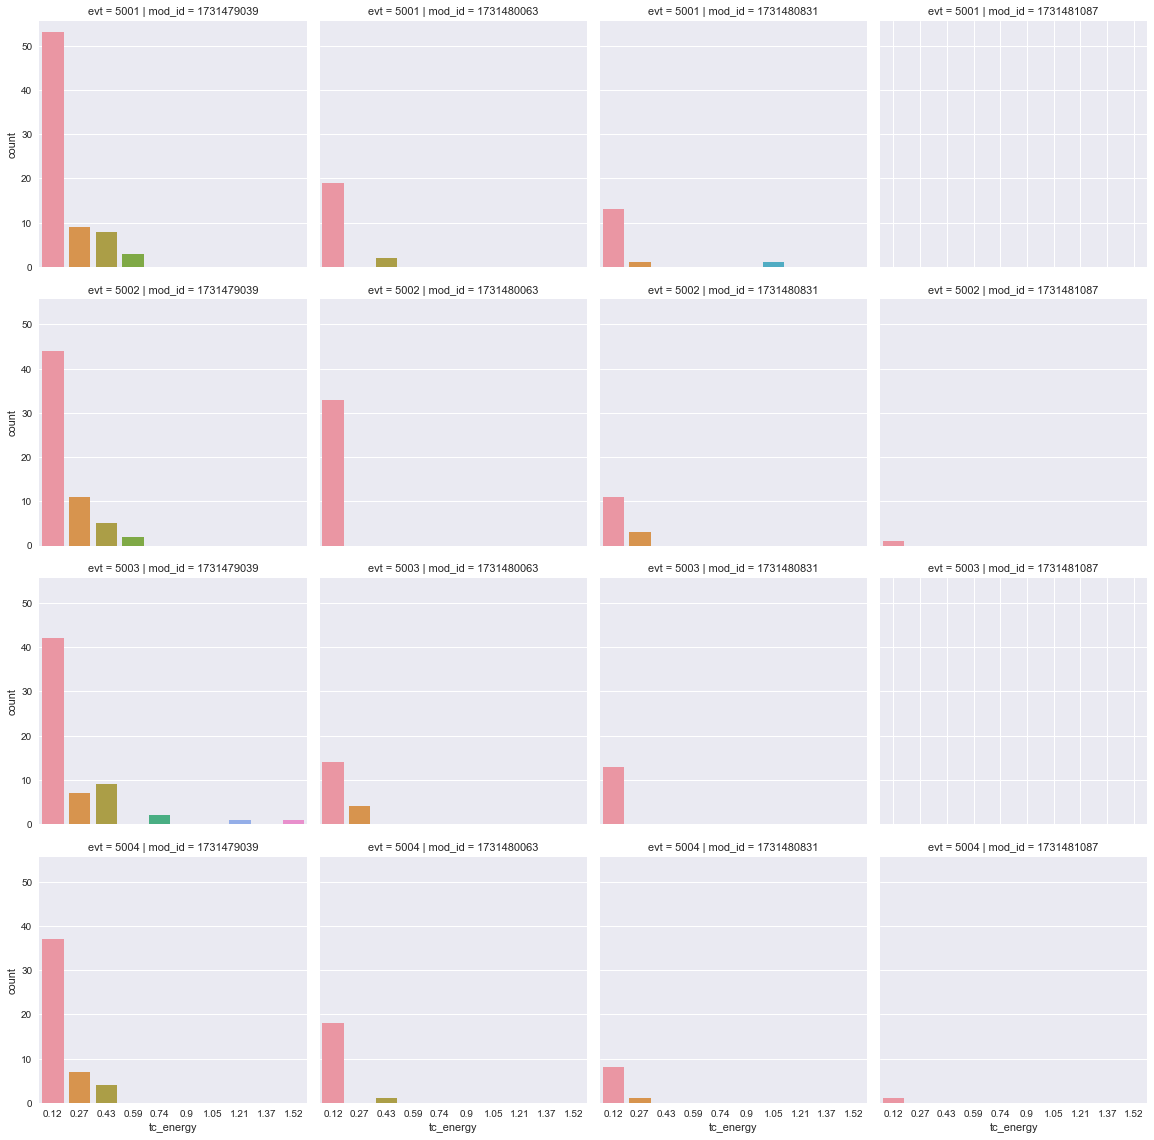

In [5]:
my_mboard = df.query('zside == 1 and subdet == 3 and layer == 6 and mboard_id == 3 and tc_energy > 0 and evt < 5005')
s, bins = pd.cut(my_mboard.tc_energy, 10, retbins=True)
mid = [round((a + b)/2, 2) for a,b in zip(bins[:-1], bins[1:])]
my_mboard.tc_energy = s.cat.rename_categories(mid)
g = sns.factorplot('tc_energy', row='evt', col='mod_id', data=my_mboard, kind='count');